# Keras Regression Project - King County House Sales Prediction 

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [30]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


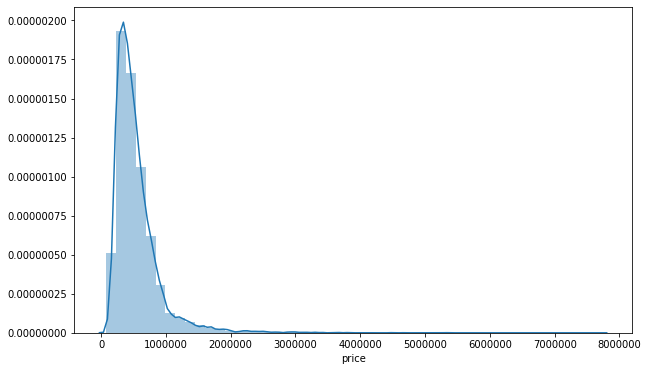

In [21]:
plt.figure(figsize = (10,6))
sns.distplot(df['price'])

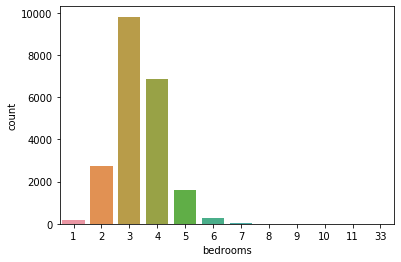

In [48]:
sns.countplot(df['bedrooms'])

In [28]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

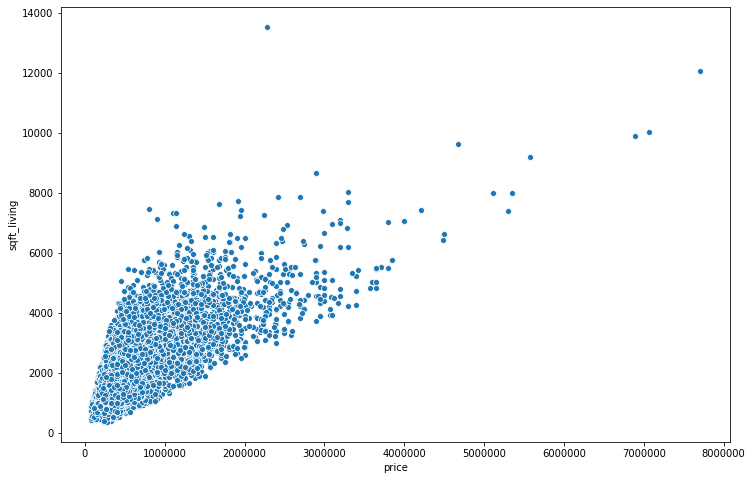

In [38]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)

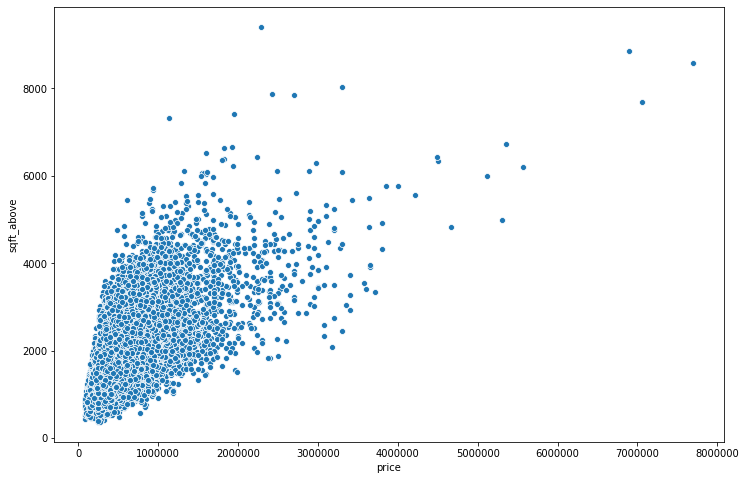

In [39]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'price', y = 'sqft_above', data = df)

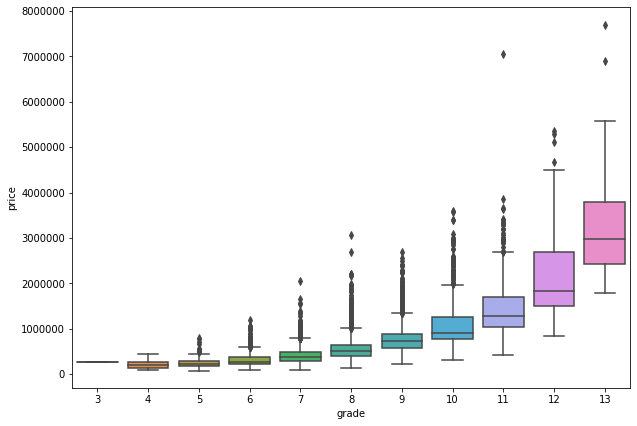

In [40]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'grade', y = 'price', data = df)

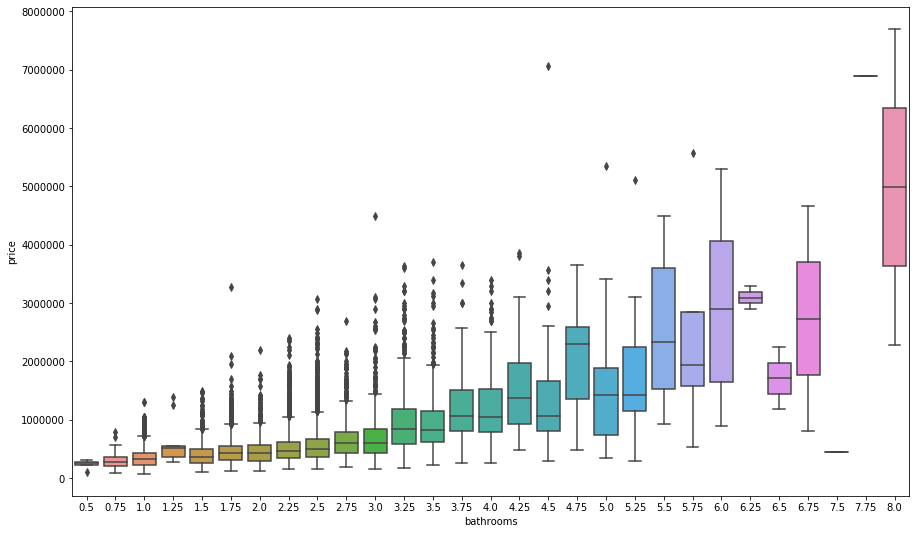

In [44]:
plt.figure(figsize = (15,9))
sns.boxplot(x = 'bathrooms', y = 'price', data = df)

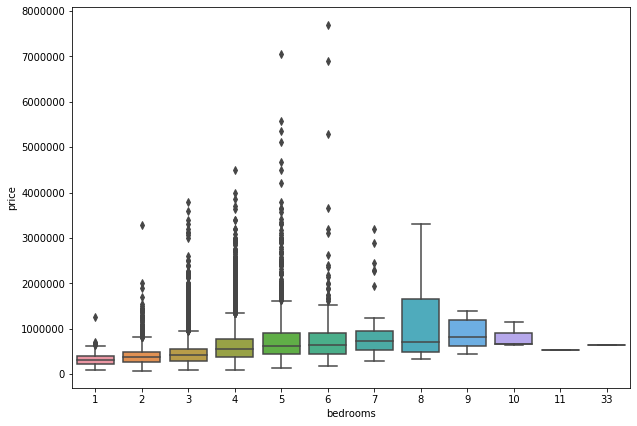

In [49]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

### Geographical Properties

In [50]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

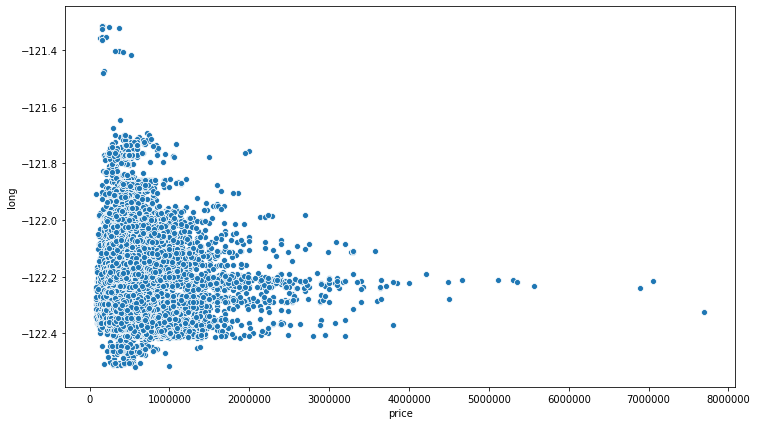

In [55]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'price', y = 'long', data = df)

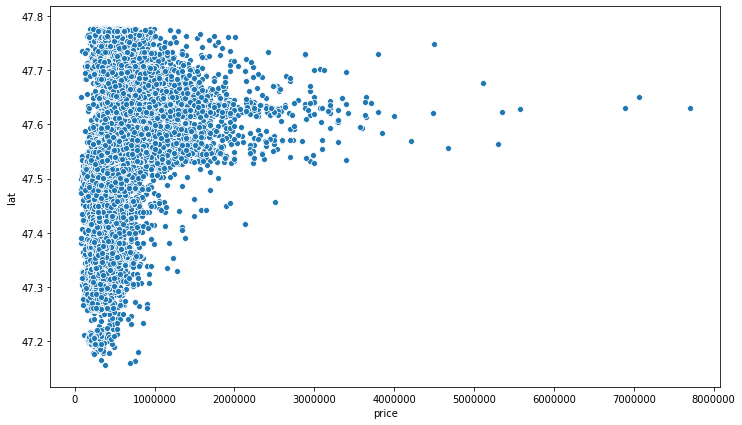

In [56]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'price', y = 'lat', data = df)

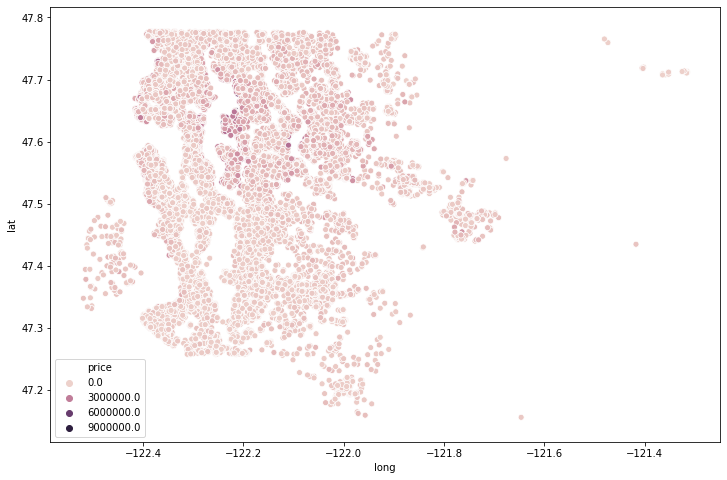

In [58]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long', y = 'lat', hue = 'price', data = df)

In [62]:
df.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [63]:
len(df)*0.01

215.97

In [64]:
non_top_1_perc = df.sort_values('price', ascending = False).iloc[216:]

In [65]:
non_top_1_perc.sort_values('price', ascending = False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
15363,1568100920,4/8/2015,1950000.0,4,2.50,3440,14554,2.0,1,4,...,8,2170,1270,2012,0,98155,47.7364,-122.286,3170,11810
16238,3760500280,10/14/2014,1950000.0,3,2.50,2510,12779,1.5,0,4,...,10,2510,0,1968,0,98034,47.6982,-122.231,2810,12225
18860,4389201241,12/30/2014,1950000.0,4,4.00,4690,6900,2.0,0,0,...,11,3480,1210,2001,0,98004,47.6165,-122.216,2800,11240
14241,2425049107,3/5/2015,1950000.0,4,3.75,4150,17424,1.0,0,0,...,9,3130,1020,1963,2000,98039,47.6390,-122.236,3930,21420
556,5486800070,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,0,1,...,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697


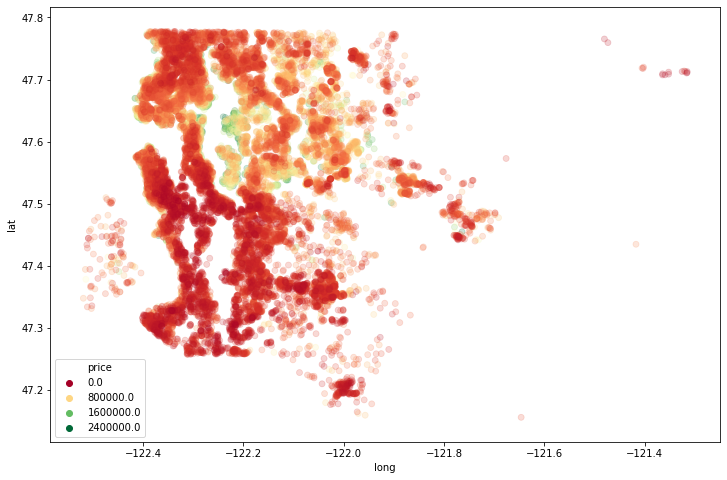

In [67]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long', y = 'lat', hue = 'price', edgecolor = None,
                alpha = 0.2, palette = 'RdYlGn', data = non_top_1_perc)

### Other Features

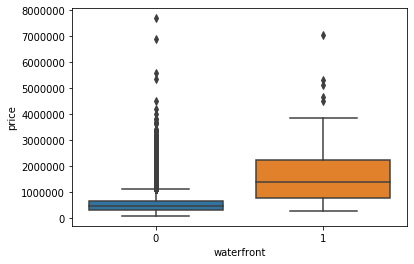

In [69]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

## Working with Feature Data

In [70]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [72]:
 df = df.drop('id', axis = 1)

### Feature Engineering from Date

In [73]:
df['date'] = pd.to_datetime(df['date'])

In [74]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [ ]:
# def year_extraction(date):
#     return date.year

In [75]:
df['year'] = df['date'].apply(lambda date: date.year) 
df['month'] = df['date'].apply(lambda date: date.month) 

In [76]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


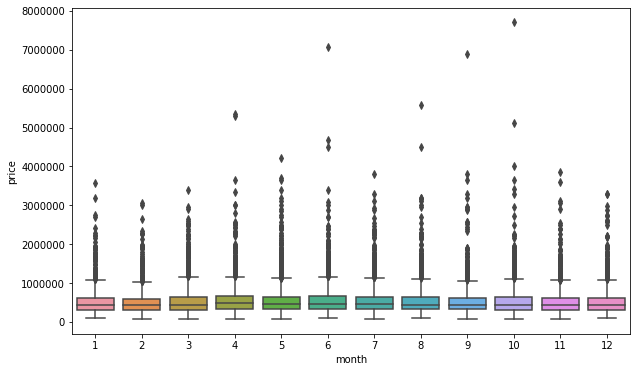

In [77]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'month', y = 'price', data = df)

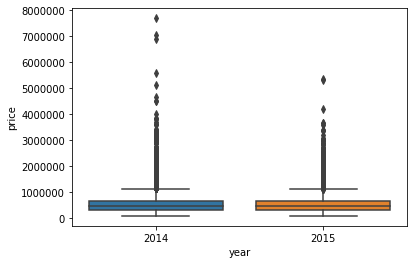

In [79]:
sns.boxplot(x = 'year', y = 'price', data = df)

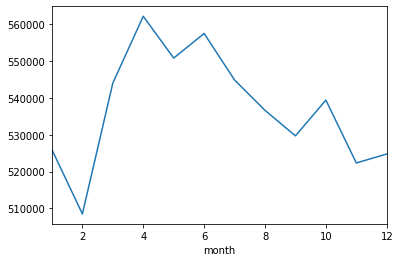

In [80]:
df.groupby('month').mean()['price'].plot()

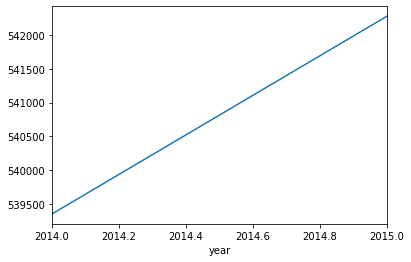

In [81]:
df.groupby('year').mean()['price'].plot()

In [82]:
df = df.drop('date', axis = 1)

In [83]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [86]:
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [87]:
df = df.drop('zipcode', axis = 1)

In [91]:
# It could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [92]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [93]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler()

In [98]:
X_train = scaler.fit_transform(X_train)

In [99]:
X_test = scaler.transform(X_test)

In [102]:
X_train.shape

(15117, 19)

In [104]:
X_test.shape

(6480, 19)

## Creating a Model

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [107]:
model = Sequential()

model.add(Dense(19, input_shape=(19,), activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

## Training the Model

In [108]:
model.fit(x = X_train, y = y_train, 
          validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 72us/sample - loss: 430235404374.0276 - val_loss: 418884720564.1481
Epoch 2/400
15117/15117 [==============================] - 0s 28us/sample - loss: 428752968203.6171 - val_loss: 413811366661.6889
Epoch 3/400
15117/15117 [==============================] - 0s 27us/sample - loss: 409054359159.9307 - val_loss: 369848223799.6247
Epoch 4/400
15117/15117 [==============================] - 0s 27us/sample - loss: 319890500520.8208 - val_loss: 232648094110.6568
Epoch 5/400
15117/15117 [==============================] - 0s 28us/sample - loss: 165165974157.5392 - val_loss: 105899446949.6099
Epoch 6/400
15117/15117 [==============================] - 0s 28us/sample - loss: 100177128174.5405 - val_loss: 93885442498.0543
Epoch 7/400
15117/15117 [==============================] - 0s 29us/sample - loss: 96246409510.6616 - val_loss: 92365290549.0963
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 25us/sample - loss: 33221021835.8119 - val_loss: 31753123086.5383
Epoch 128/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33167129845.8223 - val_loss: 31764683394.2123
Epoch 129/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33170559654.1959 - val_loss: 31702832272.1185
Epoch 130/400
15117/15117 [==============================] - 0s 25us/sample - loss: 33162513489.3537 - val_loss: 31689221132.6420
Epoch 131/400
15117/15117 [==============================] - 0s 30us/sample - loss: 33078446419.4367 - val_loss: 31660500152.5728
Epoch 132/400
15117/15117 [==============================] - 0s 29us/sample - loss: 33113659379.1975 - val_loss: 31568596339.6741
Epoch 133/400
15117/15117 [==============================] - 1s 47us/sample - loss: 33033564312.4112 - val_loss: 31498415232.9481
Epoch 134/400
15117/15117 [==============================] - 1s 47us/sample - loss: 32977062869.5281 - v

15117/15117 [==============================] - 0s 30us/sample - loss: 30744831809.3844 - val_loss: 28799362252.8000
Epoch 254/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30770111026.1602 - val_loss: 28809008818.2519
Epoch 255/400
15117/15117 [==============================] - 0s 32us/sample - loss: 30726190179.0334 - val_loss: 28832861383.7432
Epoch 256/400
15117/15117 [==============================] - 1s 34us/sample - loss: 30752074316.6290 - val_loss: 28785009843.5160
Epoch 257/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30702481330.5074 - val_loss: 28755853923.8716
Epoch 258/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30828086420.9565 - val_loss: 28806184302.6173
Epoch 259/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30682980476.4353 - val_loss: 28718350922.5877
Epoch 260/400
15117/15117 [==============================] - 0s 32us/sample - loss: 30670113946.2401 - v

15117/15117 [==============================] - 0s 28us/sample - loss: 29508621956.8010 - val_loss: 27309056713.0074
Epoch 380/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29497905551.1141 - val_loss: 27354024102.8741
Epoch 381/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29481085462.7262 - val_loss: 27226766116.0296
Epoch 382/400
15117/15117 [==============================] - 0s 28us/sample - loss: 29441755030.0573 - val_loss: 27472295293.7877
Epoch 383/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29447932880.9219 - val_loss: 27227668313.1259
Epoch 384/400
15117/15117 [==============================] - 0s 28us/sample - loss: 29433891948.7200 - val_loss: 27175000873.0864
Epoch 385/400
15117/15117 [==============================] - 0s 28us/sample - loss: 29414276646.2383 - val_loss: 27165469577.1654
Epoch 386/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29381421047.3295 - v

In [109]:
losses = pd.DataFrame(model.history.history)

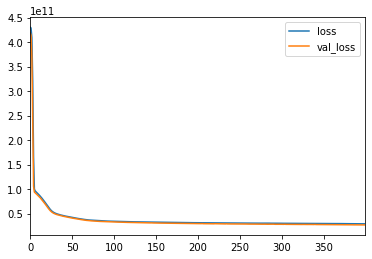

In [115]:
losses.plot()

# Evaluation on Test Data

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

### Predicting on Brand New Data

In [117]:
predictions = model.predict(X_test)

In [118]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, predictions))

164290.82346650667

In [119]:
mean_absolute_error(y_test, predictions)

101197.59357036072

In [120]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [128]:
5.402966e+05

540296.6

In [122]:
explained_variance_score(y_test, predictions)

0.7965072754103196

In [124]:
df['price'].mean()

540296.5735055795

In [125]:
df['price'].median()

450000.0

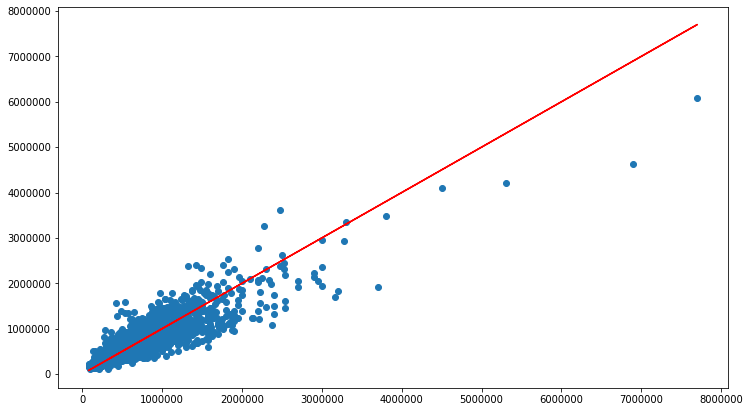

In [135]:
plt.figure(figsize = (12,7))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r') # perfect prediction line

In [139]:
pred_df = pd.DataFrame(y_test, columns = ['Test True Y'])

In [141]:
predictions = pd.Series(predictions.reshape(6480,))

In [143]:
pred_df = pd.concat([pred_df, predictions], axis = 1)

In [145]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [146]:
pred_df.head(5)

,Test True Y,Model Predictions
0,319000.0,399830.90625
1,464625.0,594954.56250
2,489950.0,581316.18750
3,395000.0,393710.37500
4,458000.0,460675.68750


In [147]:
pred_df['Error'] = pred_df['Test True Y'] - pred_df['Model Predictions']

In [148]:
pred_df.head(5)

,Test True Y,Model Predictions,Error
0,319000.0,399830.90625,-80830.90625
1,464625.0,594954.56250,-130329.56250
2,489950.0,581316.18750,-91366.18750
3,395000.0,393710.37500,1289.62500
4,458000.0,460675.68750,-2675.68750


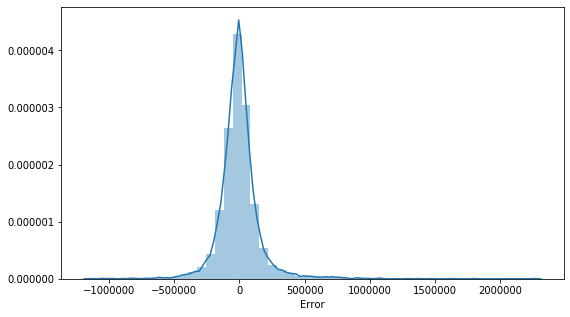

In [150]:
plt.figure(figsize=(9,5))
sns.distplot(pred_df['Error'],bins=50)

### Predicting on a brand new house

In [153]:
single_house = df.drop('price', axis = 1).iloc[0]

In [155]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [156]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [157]:
model.predict(single_house)

array([[286185.97]], dtype=float32)

In [158]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
